In [27]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

data_dir = 'Spine_img/'

X = []
y = []

for folder in os.scandir(data_dir):
    print(folder)
   
    for entry in os.scandir(data_dir + folder.name):
        img = cv2.imread(data_dir + folder.name + '/' + entry.name, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.array(img, dtype='float32')
        img = img / 255
        X.append(img)
        if folder.name == 'normal':
            y.append(0)
        elif folder.name == 'osteophenia':
            y.append(1)
        else:
            y.append(2)

       

X = np.array(X)
y = np.array(y)



<DirEntry 'normal'>
<DirEntry 'osteophenia'>
<DirEntry 'osteoporosis'>


In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

opt = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


Epoch 1/30
9/9 [==============================] - 37s 4s/step - loss: 1.1931 - accuracy: 0.3500 - val_loss: 1.1171 - val_accuracy: 0.3239
Epoch 2/30
9/9 [==============================] - 35s 4s/step - loss: 1.1433 - accuracy: 0.3429 - val_loss: 1.1007 - val_accuracy: 0.3239
Epoch 3/30
9/9 [==============================] - 35s 4s/step - loss: 1.1286 - accuracy: 0.3393 - val_loss: 1.0915 - val_accuracy: 0.4930
Epoch 4/30
9/9 [==============================] - 34s 4s/step - loss: 1.0982 - accuracy: 0.4036 - val_loss: 1.0916 - val_accuracy: 0.3944
Epoch 5/30
9/9 [==============================] - 35s 4s/step - loss: 1.1287 - accuracy: 0.3000 - val_loss: 1.0874 - val_accuracy: 0.4366
Epoch 6/30
9/9 [==============================] - 36s 4s/step - loss: 1.1168 - accuracy: 0.3429 - val_loss: 1.0872 - val_accuracy: 0.3662
Epoch 7/30
9/9 [==============================] - 35s 4s/step - loss: 1.1011 - accuracy: 0.3857 - val_loss: 1.0836 - val_accuracy: 0.4507
Epoch 8/30
9/9 [==================

In [32]:
history1= model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


Epoch 1/30
9/9 [==============================] - 34s 4s/step - loss: 1.0746 - accuracy: 0.4893 - val_loss: 1.0481 - val_accuracy: 0.4789
Epoch 2/30
9/9 [==============================] - 34s 4s/step - loss: 1.0419 - accuracy: 0.4607 - val_loss: 1.0375 - val_accuracy: 0.4930
Epoch 3/30
9/9 [==============================] - 34s 4s/step - loss: 1.0221 - accuracy: 0.5071 - val_loss: 1.0295 - val_accuracy: 0.4789
Epoch 4/30
9/9 [==============================] - 34s 4s/step - loss: 1.0108 - accuracy: 0.5036 - val_loss: 1.0390 - val_accuracy: 0.4648
Epoch 5/30
9/9 [==============================] - 34s 4s/step - loss: 1.0233 - accuracy: 0.4571 - val_loss: 1.0219 - val_accuracy: 0.5493
Epoch 6/30
9/9 [==============================] - 34s 4s/step - loss: 1.0108 - accuracy: 0.4857 - val_loss: 1.0365 - val_accuracy: 0.4648
Epoch 7/30
9/9 [==============================] - 34s 4s/step - loss: 0.9941 - accuracy: 0.4893 - val_loss: 1.0114 - val_accuracy: 0.5070
Epoch 8/30
9/9 [==================

In [33]:
history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)

Epoch 1/30
9/9 [==============================] - 34s 4s/step - loss: 0.8264 - accuracy: 0.6214 - val_loss: 0.8439 - val_accuracy: 0.6620
Epoch 2/30
9/9 [==============================] - 34s 4s/step - loss: 0.7681 - accuracy: 0.6393 - val_loss: 0.8364 - val_accuracy: 0.6479
Epoch 3/30
9/9 [==============================] - 34s 4s/step - loss: 0.7862 - accuracy: 0.6500 - val_loss: 0.8397 - val_accuracy: 0.6620
Epoch 4/30
9/9 [==============================] - 37s 4s/step - loss: 0.8164 - accuracy: 0.6250 - val_loss: 0.8209 - val_accuracy: 0.6479
Epoch 5/30
9/9 [==============================] - 34s 4s/step - loss: 0.7574 - accuracy: 0.6357 - val_loss: 0.8322 - val_accuracy: 0.6479
Epoch 6/30
9/9 [==============================] - 36s 4s/step - loss: 0.7604 - accuracy: 0.6643 - val_loss: 0.8096 - val_accuracy: 0.6761
Epoch 7/30
9/9 [==============================] - 34s 4s/step - loss: 0.7341 - accuracy: 0.6893 - val_loss: 0.8016 - val_accuracy: 0.6901
Epoch 8/30
9/9 [==================

In [37]:
history3 = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32, shuffle=True)

Epoch 1/5
9/9 [==============================] - 35s 4s/step - loss: 0.4990 - accuracy: 0.8071 - val_loss: 0.7151 - val_accuracy: 0.7183
Epoch 2/5
9/9 [==============================] - 34s 4s/step - loss: 0.4946 - accuracy: 0.8321 - val_loss: 0.7234 - val_accuracy: 0.7042
Epoch 3/5
9/9 [==============================] - 34s 4s/step - loss: 0.4800 - accuracy: 0.8321 - val_loss: 0.7036 - val_accuracy: 0.7183
Epoch 4/5
9/9 [==============================] - 35s 4s/step - loss: 0.5053 - accuracy: 0.8107 - val_loss: 0.7284 - val_accuracy: 0.7042
Epoch 5/5
9/9 [==============================] - 35s 4s/step - loss: 0.4945 - accuracy: 0.8143 - val_loss: 0.7052 - val_accuracy: 0.7324


In [38]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Test Accuracy:", test_accuracy)

3/3 [==============================] - 8s 2s/step - loss: 0.7052 - accuracy: 0.7324
Test Accuracy: 0.7323943376541138


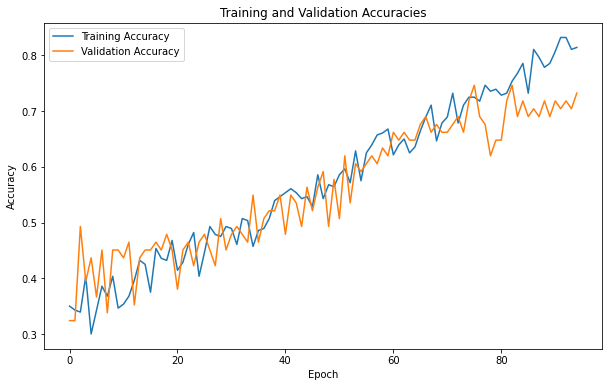

In [39]:
import matplotlib.pyplot as plt

# Combine histories
combined_history = {}
for i, history in enumerate([history, history1, history2, history3]):
    for key in history.history:
        if key not in combined_history:
            combined_history[key] = []
        combined_history[key].extend(history.history[key])

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [40]:
model.save('spine_VGG19_without_aug.h5')

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
